In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle
from google.colab.patches import cv2_imshow

In [8]:
!pip install sklearn

In [ ]:
import os
path=os.listdir('/content/drive/MyDrive/Philips/archive.zip (Unzipped Files)/Training/')
classes={'no_tumor':0, 'pituitary_tumor':1,'meningioma_tumor':2, 'glioma_tumor':3}

In [ ]:
import cv2
X=[]
Y=[]
for cls in classes:
  pth='/content/drive/MyDrive/Philips/archive.zip (Unzipped Files)/Training/'+cls
  for j in os.listdir(pth):
    img=cv2.imread(pth+'/'+j,0)
    img=cv2.resize(img, (200,200))
    X.append(img)
    Y.append(classes[cls])


In [ ]:
np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
pd.Series(Y).value_counts()

1    827
3    826
2    822
0    395
dtype: int64

In [ ]:
X.shape

(2870, 200, 200)

# Visualizing the data


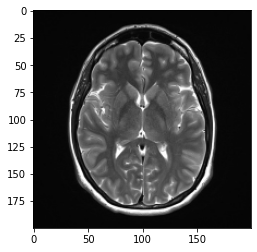

In [ ]:
plt.imshow(X[0], cmap='gray')

# PREPROCESSING

In [ ]:
X_new=X.reshape(len(X),-1)
X_new.shape

(2870, 40000)

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(X_new, Y, random_state=101, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape

((2009, 40000), (861, 40000))

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from sklearn.svm import SVC
# sv=SVC()
# sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training score hai", sv.score(X_train,y_train))

Training score hai 0.9437531110004977


In [ ]:
img1=X[0].reshape(1,-1)/255

In [ ]:
img1.shape

(1, 40000)

In [ ]:
print(sv.predict(img1))

[0]


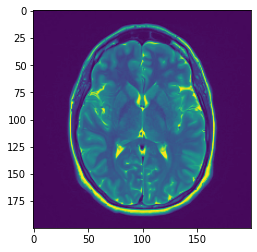

In [ ]:
plt.imshow(X[0])

In [ ]:
pickle.dump(sv, open('final_model.sav', 'wb'))

In [ ]:
!pwd

/content


# Testing with custom image

In [ ]:
import pickle
import numpy as np
import pandas as pd
import cv2

In [ ]:
loaded_model = pickle.load(open('final_model.sav', 'rb'))

In [ ]:
classes={'no_tumor':0, 'pituitary_tumor':1,'meningioma_tumor':2, 'glioma_tumor':3}

In [ ]:
def prediction(path):
  new_img=cv2.imread(path)
  img1=cv2.resize(new_img,(200,200))
  img=np.mean(img1,axis=2)
  img1=img.reshape(1,-1)/255
  pred=loaded_model.predict(img1)[0]
  return pred

In [ ]:
prediction('/content/Testing/glioma_tumor/image(1).jpg')

0